In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize 
from data_retriever import read_tickers

### Format Curated Data

In [10]:
# read in data
tickers = ['AAPL', 'AMZN', 'GOOGL', 'FB']
df1 = pd.DataFrame()

for symbol in tickers:
    try:
        adj_close = pd.read_csv(f'data/time_series_daily_curated/{symbol}.csv', index_col=0).loc['5. adjusted close',:]
        adj_close.name = symbol
        df1 = df1.append(adj_close)
    except:
        continue
        
df1 = df1.transpose()

# convert index to datetime
df1.index = pd.to_datetime(df1.index, infer_datetime_format=True)
df1 = df1.loc['2016-01-01':'2017-12-31']

df1

,AAPL,AMZN,GOOGL,FB
2016-01-04,24.320249,636.99,759.44,102.22
2016-01-05,23.710800,633.79,761.53,102.73
2016-01-06,23.246788,632.65,759.33,102.97
2016-01-07,22.265667,607.94,741.00,97.92
2016-01-08,22.383401,607.05,730.91,97.33
...,...,...,...,...
2017-12-22,41.967723,1168.36,1068.86,177.20
2017-12-26,40.903003,1176.76,1065.85,175.99
2017-12-27,40.910197,1182.26,1060.20,177.62
2017-12-28,41.025302,1186.10,1055.95,177.92


In [11]:
# read in data
tickers = ['AAPL', 'NKE', 'GOOGL', 'AMZN']
df2 = pd.DataFrame()

for symbol in tickers:
    try:
        adj_close = pd.read_csv(f'data/time_series_daily_curated/{symbol}.csv', index_col=0).loc['5. adjusted close',:]
        adj_close.name = symbol
        df2 = df2.append(adj_close)
    except:
        continue
        
df2 = df2.transpose()

# convert index to datetime
df2.index = pd.to_datetime(df2.index, infer_datetime_format=True)
df2 = df2.loc['2014-12-31':'2019-12-31']

df2

,AAPL,NKE,GOOGL,AMZN
2014-12-31,25.055635,44.787847,530.66,310.35
2015-01-02,24.817291,44.266137,529.55,308.52
2015-01-05,24.118149,43.553444,519.46,302.19
2015-01-06,24.120419,43.297248,506.64,295.29
2015-01-07,24.458640,44.191607,505.15,298.42
...,...,...,...,...
2019-12-24,70.233925,98.801833,1344.43,1789.21
2019-12-26,71.627386,99.364216,1362.47,1868.77
2019-12-27,71.600209,100.212724,1354.64,1869.80
2019-12-30,72.025165,99.453014,1339.71,1846.89


### Format Full Data

In [12]:
# read in data
tickers = read_tickers()['Symbol']
df3 = pd.DataFrame()

for symbol in tickers:
    try:
        adj_close = pd.read_csv(f'data/time_series_daily/{symbol}.csv', index_col=0).loc['5. adjusted close',:]
        adj_close.name = symbol
        df3 = df3.append(adj_close)
    except:
        continue
        
df3 = df3.transpose()

# convert index to datetime
df3.index = pd.to_datetime(df3.index, infer_datetime_format=True)

df3

,ABM,ACN,AER,AI,AL,ALTG,AMWL,ANET,ARW,ASAN,...,WORK,WPP,XRX,YALA,YELP,YEXT,ZEN,ZEPP,ZIP,ZUO
2021-01-08,40.598779,262.446892,44.40,143.63,43.179891,10.37,27.14,306.12,104.35,31.58,...,42.35,56.44,23.312121,15.19,32.53,17.12,149.37,13.34,NaN,14.37
2021-01-11,40.558928,258.661600,45.76,135.62,44.804619,10.38,26.36,302.96,104.00,32.08,...,42.07,55.17,23.203232,17.71,32.31,16.60,152.26,13.57,NaN,14.23
2021-01-12,41.475514,256.724246,46.35,133.98,45.502355,10.51,26.29,316.28,104.77,34.98,...,42.14,55.56,22.985455,17.79,31.95,16.83,152.66,13.53,NaN,14.34
2021-01-13,41.575143,256.287099,44.74,143.14,44.037109,10.37,25.25,309.63,103.69,36.48,...,42.29,54.33,22.708283,18.10,31.40,16.75,147.11,13.69,NaN,14.08
2021-01-14,41.893955,254.213515,46.48,138.50,45.083713,10.09,28.70,313.10,104.11,37.14,...,41.92,55.43,22.807273,17.34,31.87,16.91,146.23,14.04,NaN,13.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-26,49.740000,283.950000,58.91,61.43,47.110000,14.40,12.12,338.46,121.96,36.10,...,43.13,69.37,23.750000,16.05,38.73,12.53,136.45,10.00,21.10,15.04
2021-05-27,50.010000,280.050000,59.00,63.20,47.080000,14.57,12.50,337.12,121.24,36.84,...,42.85,69.20,23.990000,15.94,39.81,12.31,137.05,10.37,20.85,15.06
2021-05-28,49.890000,282.160000,59.00,61.71,47.060000,14.66,12.45,339.38,120.33,36.78,...,44.04,69.19,23.450000,15.57,40.11,14.47,136.66,9.99,21.01,15.47
2021-06-01,50.660000,280.880000,60.11,71.76,48.200000,14.54,12.83,334.87,121.94,37.00,...,43.84,71.33,23.420000,17.88,39.93,13.68,134.62,10.43,23.05,14.98


### Analysis & Metrics

In [13]:
df = df1

# expected daily returns
expected_returns = df.pct_change().mean()

# log of percent change
pct_change = df.pct_change().apply(lambda x : np.log(1+x))

# correlation matrix
corr_matrix = pct_change.corr()

# covariance matrix
cov_matrix = pct_change.cov()
cov_matrix

,AAPL,AMZN,GOOGL,FB
AAPL,0.000170,0.000086,0.000072,0.000080
AMZN,0.000086,0.000251,0.000110,0.000139
GOOGL,0.000072,0.000110,0.000126,0.000108
FB,0.000080,0.000139,0.000108,0.000211


In [46]:
RISK_FREE_RATE = 0.0162 # current risk free rate
NUM_TRADING_DAYS = 250


# returns expected_returns and cov_matrix
def extract_info(df):
    returns = df.pct_change().mean()
    cov = df.pct_change().apply(lambda x : np.log(1+x)).cov()
    return returns, cov


# annualised performance of given weights
def annualised_performance(weights, expected_returns, cov_matrix):
    returns = np.dot(weights, expected_returns) * NUM_TRADING_DAYS
    volatility = np.sqrt(cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum() * NUM_TRADING_DAYS)
    return returns, volatility

### Sharpe Ratio

In [47]:
# sharpe ratio
def sharpe_ratio(weights, expected_returns, cov_matrix):
    returns, volatility = annualised_performance(weights, expected_returns, cov_matrix)
    return (returns - RISK_FREE_RATE) / volatility


# negative sharpe ratio
def neg_sharpe_ratio(weights, expected_returns, cov_matrix):
    return -sharpe_ratio(weights, expected_returns, cov_matrix)


def optimize_sharpe_ratio(expected_returns, cov_matrix):
    num_assets = len(expected_returns) 
    args = (expected_returns, cov_matrix)
    bounds = tuple((0.0, 1.0) for asset in range(num_assets))
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    return minimize(neg_sharpe_ratio, num_assets * [1/num_assets], args=args, bounds=bounds, constraints=constraints)

In [51]:
# random weights
weights = np.random.random(len(expected_returns))
weights = weights / np.sum(weights)
print(f'Sharpe ratio (random): {sharpe_ratio(weights, expected_returns, cov_matrix)}')

# optimized weights
result = optimize_sharpe_ratio(expected_returns, cov_matrix).x
returns, volatility = annualised_performance(result, expected_returns, cov_matrix)
print(f'Sharpe ratio (optimized): {sharpe_ratio(result, expected_returns, cov_matrix)}\n')
print(f'Annualised returns: {returns}')
print(f'Annualised volatility: {volatility}')
print(f'Weights: {result}')

Sharpe ratio (random): 1.4442220823444982
Sharpe ratio (optimized): 1.5566845398233844

Annualised returns: 0.2991147493528735
Annualised volatility: 0.18174186363087538
Weights: [4.42440453e-01 2.91248014e-01 5.73542949e-17 2.66311533e-01]


### Efficient Frontier
The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return.

We can calculate it by minimizing the risk for a range of given returns or maximize returns for a given range of risks.

In [59]:
# annualised returns for a portfolio
def neg_annualised_return(weights, expected_returns, cov_matrix):
    return -annualised_performance(weights, expected_returns, cov_matrix)[0]


# annualised volatility for a portfolio
def annualised_volatility(weights, expected_returns, cov_matrix):
    return annualised_performance(weights, expected_returns, cov_matrix)[1]


# given fixed returns, minimize volatility
def minimize_volatility(expected_returns, cov_matrix, target_return):
    num_assets = len(expected_returns) 
    args = (expected_returns, cov_matrix)
    bounds = tuple((0.0, 1.0) for asset in range(num_assets))
    constraints = ({'type': 'eq', 'fun': lambda x: neg_annualised_return(x, expected_returns, cov_matrix) + target_return},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    return minimize(annualised_volatility, num_assets * [1/num_assets], args=args, bounds=bounds, constraints=constraints)

    
# given fixed volatiliy, maximize returns
def maximize_returns(expected_returns, cov_matrix, target_volatility):
    num_assets = len(expected_returns) 
    args = (expected_returns, cov_matrix)
    bounds = tuple((0.0, 1.0) for asset in range(num_assets))
    constraints = ({'type': 'eq', 'fun': lambda x: annualised_volatility(x, expected_returns, cov_matrix) - target_volatility},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    return minimize(neg_annualised_return, num_assets * [1/num_assets], args=args, bounds=bounds, constraints=constraints)    

In [60]:
print(f'Optimized sharpe ratio weights: {result}\n')

target_return = 0.2991147493528735
volatility_result = minimize_volatility(expected_returns, cov_matrix, target_return).x
print(f'Minimized annualised volatility for target returns {target_return}: {annualised_volatility(volatility_result, expected_returns, cov_matrix)}')
print(f'Minimized annualised volatility weights: {volatility_result}\n')

target_volatility = 0.18174186363087538
returns_result = maximize_returns(expected_returns, cov_matrix, target_volatility).x
print(f'Maximized annualised returns for target volatility {target_volatility}: {-neg_annualised_return(returns_result, expected_returns, cov_matrix)}')
print(f'Maximized annualised returns weights: {returns_result}')

Optimized sharpe ratio weights: [4.42440453e-01 2.91248014e-01 5.73542949e-17 2.66311533e-01]

Minimized annualised volatility for target returns 0.2991147493528735: 0.18174214363792834
Minimized annualised volatility weights: [4.41655030e-01 2.90757961e-01 4.55364912e-18 2.67587009e-01]

Maximized annualised returns for target volatility 0.18174186363087538: 0.29911475247366615
Maximized annualised returns weights: [0.44298014 0.29158483 0.         0.26543502]


Text(0, 0.5, 'annualised returns')

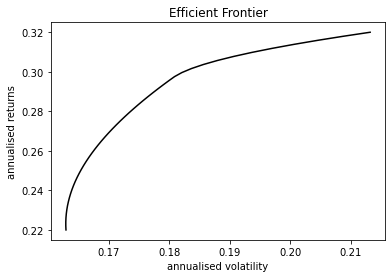

In [81]:
# calculate efficient frontier by minimizing risk for given levels of return
efficient_frontier = []
target_returns = np.linspace(0.22, 0.32, 50)
for target in target_returns:
    weights = minimize_volatility(expected_returns, cov_matrix, target).x
    returns, volatility = annualised_performance(weights, expected_returns, cov_matrix)
    efficient_frontier.append((returns, volatility))
    
# plot efficient frontier
plt.plot([x[1] for x in efficient_frontier], [y[0] for y in efficient_frontier], linestyle='-', color='black')
plt.title('Efficient Frontier')
plt.xlabel('annualised volatility')
plt.ylabel('annualised returns')

### References
https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-example/

https://towardsdatascience.com/efficient-frontier-portfolio-optimisation-in-python-e7844051e7f